In [1]:
wally.pts = read.csv('http://www.randalolson.com/wp-content/uploads/wheres-waldo-locations.csv')

,X,Y
1,2.893162,2.606303
2,10.978261,4.237319
3,6.733187,5.173611


[1] 1 3 3 3 3 3

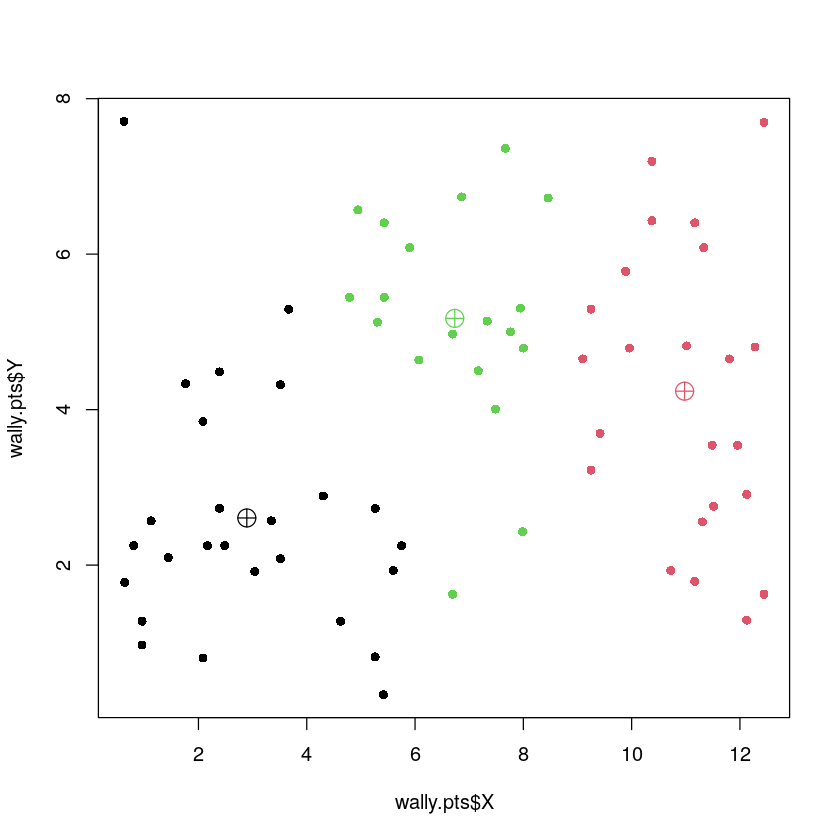

In [2]:
wally.kmean <- kmeans(wally.pts[,c("X","Y")], centers=3)
wally.kmean$centers
head(wally.kmean$cluster)
plot(wally.pts$X, wally.pts$Y, col=wally.kmean$cluster, pch=16)
points(wally.kmean$centers, col=c(1,2,3), pch=10, cex=2)

[1] 23 50 53

[1] 1 2 2 2 2 2

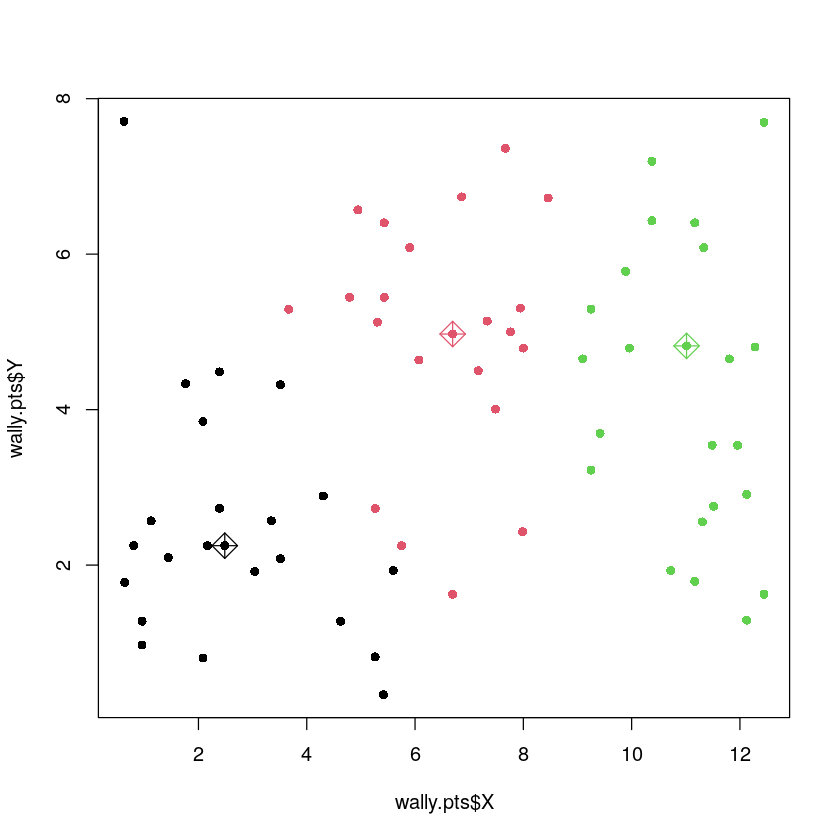

In [3]:
library(clue)
wally.kmed <- kmedoids(dist(wally.pts[,c("X","Y")]), k=3)
wally.kmed$medoid_ids
head(wally.kmed$cluster)
plot(wally.pts$X, wally.pts$Y, col=wally.kmed$cluster, pch=16)
points(wally.pts$X[wally.kmed$medoid_ids],  wally.pts$Y[wally.kmed$medoid_ids] , col=c(1,2,3), pch=9, cex=2)


In [4]:
require(mixtools)
wally.mix <- mvnormalmixEM(wally.pts[,c("X","Y")] , k=3)
wally.mix$mu

Loading required package: mixtools

mixtools package, version 1.2.0, Released 2020-02-05
This package is based upon work supported by the National Science Foundation under Grant No. SES-0518772.




number of iterations= 70 


[[1]]
[1] 3.309703 1.894833

[[2]]
[1] 7.286467 5.320073

[[3]]
[1] 11.673277  2.712984

In [5]:
head(round(wally.mix$posterior, digits=4))

comp.1,comp.2,comp.3
0,1,0
0,1,0
0,1,0
0,1,0
0,1,0
0,1,0


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 3 1 1 3 3 3 3 3 3 3

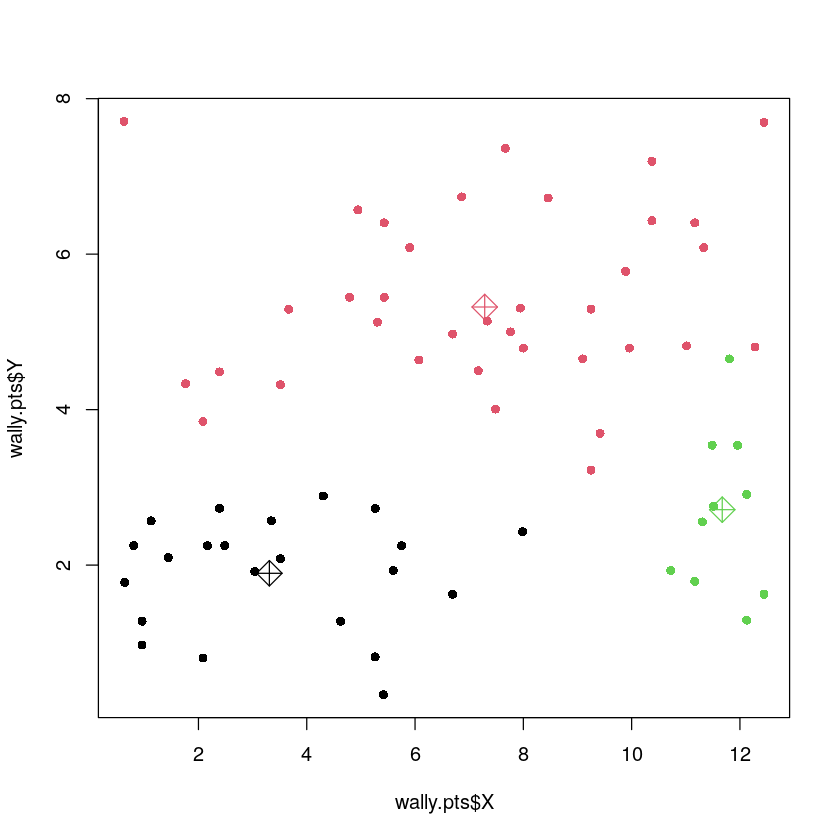

In [6]:
wally.cluster <- apply(wally.mix$posterior, 1, which.max)
wally.cluster

plot(wally.pts$X, wally.pts$Y, col=wally.cluster, pch=16)
mu <- matrix(unlist(wally.mix$mu), ncol=2,byrow=TRUE)
points(mu, col=c(1,2,3), pch=9, cex=2)

Loading required package: mclust

Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


Attaching package: ‘mclust’


The following object is masked from ‘package:mixtools’:

    dmvnorm




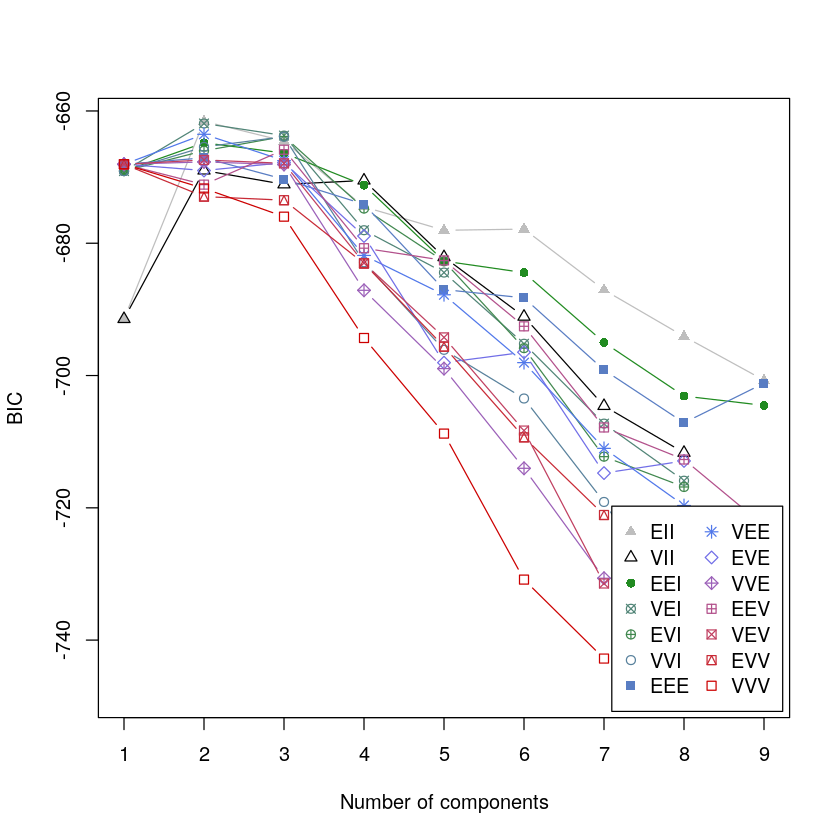

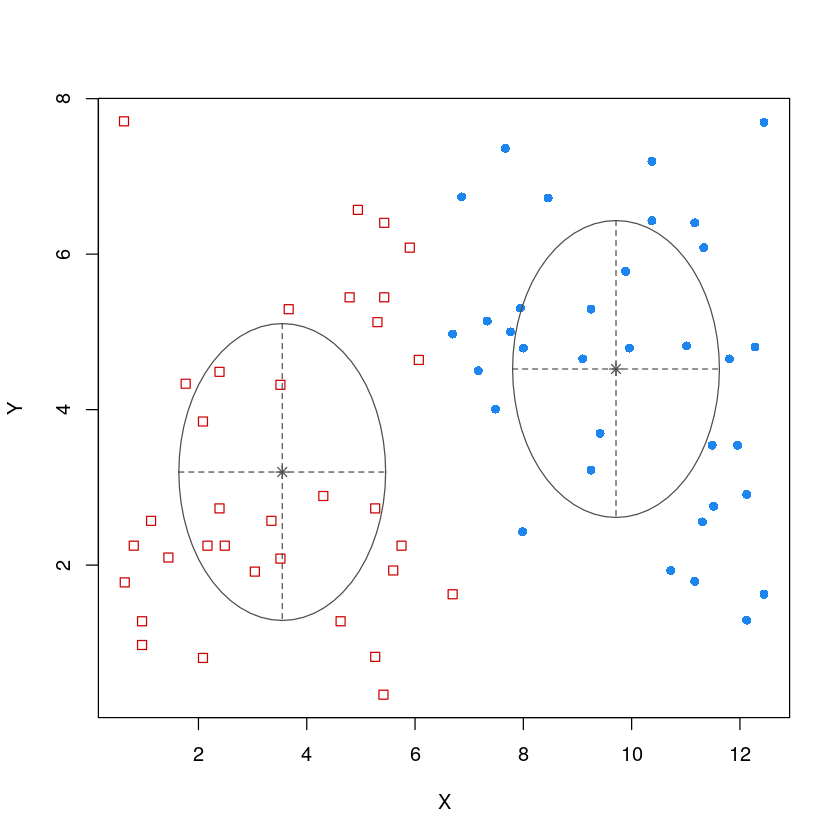

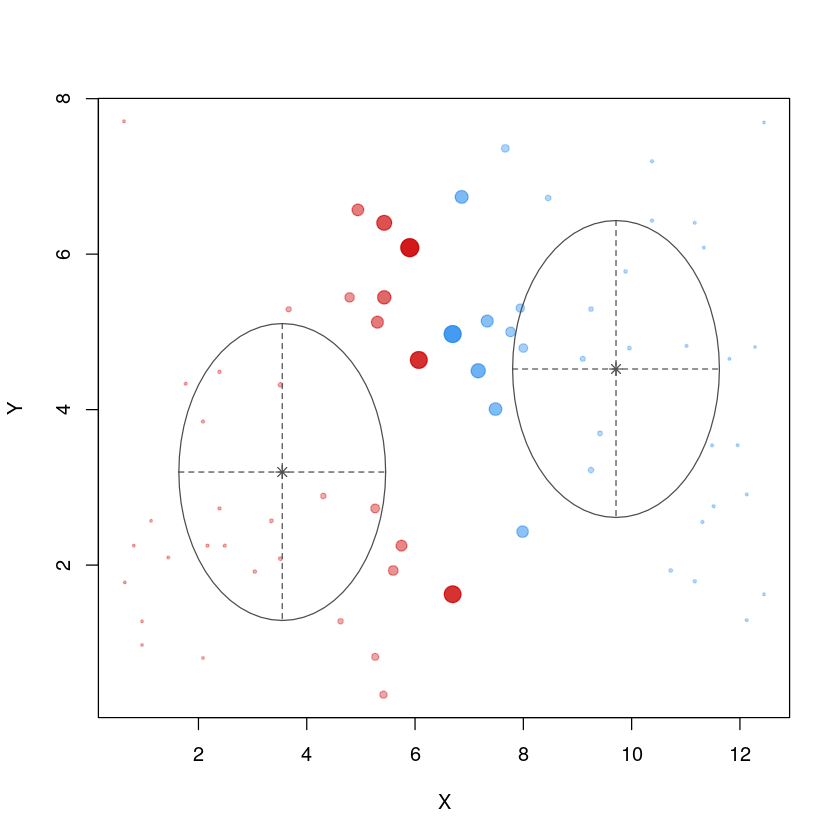

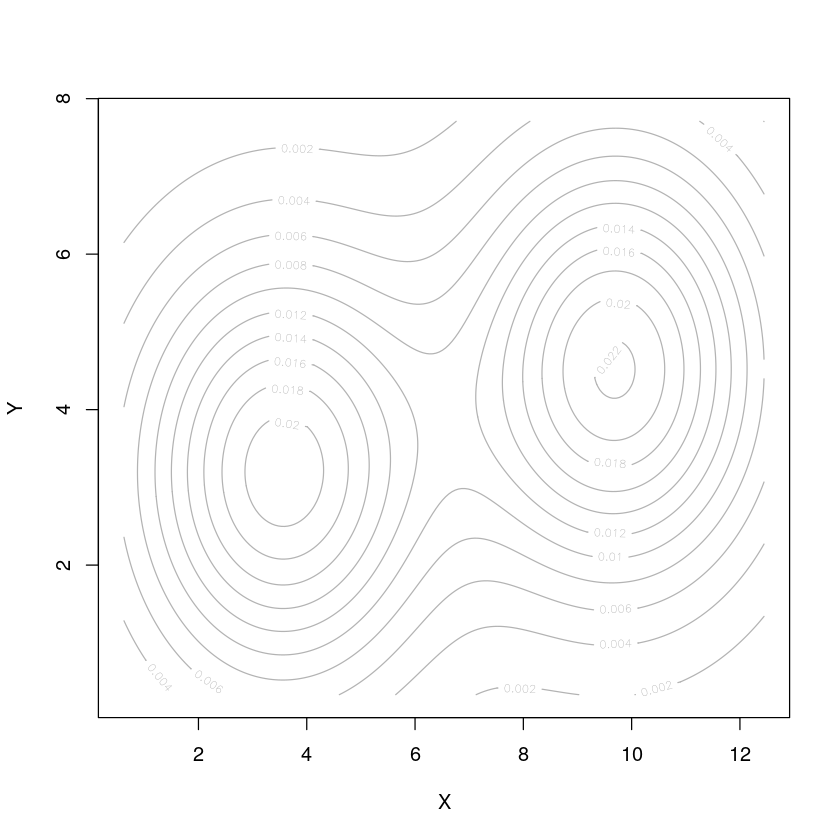

In [7]:
require(mclust)
wally.mixx <- Mclust(wally.pts[,c("X","Y")])
plot(wally.mixx)

In [8]:
H = diag(1,2)
H

1,0
0,1


Loading required package: ks



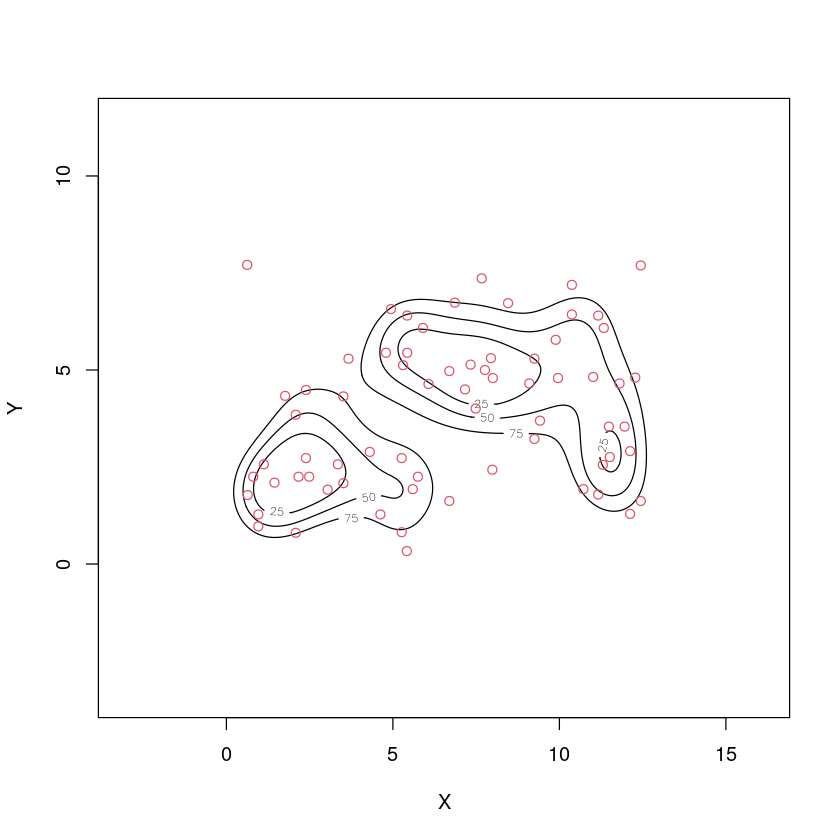

In [9]:
require(ks)
wally <- wally.pts[,c("X", "Y")]
wally.ks <- kde(wally, H=H, gridsize=200)
plot(wally.ks)
points(wally.pts$X, wally.pts$Y, col=2)

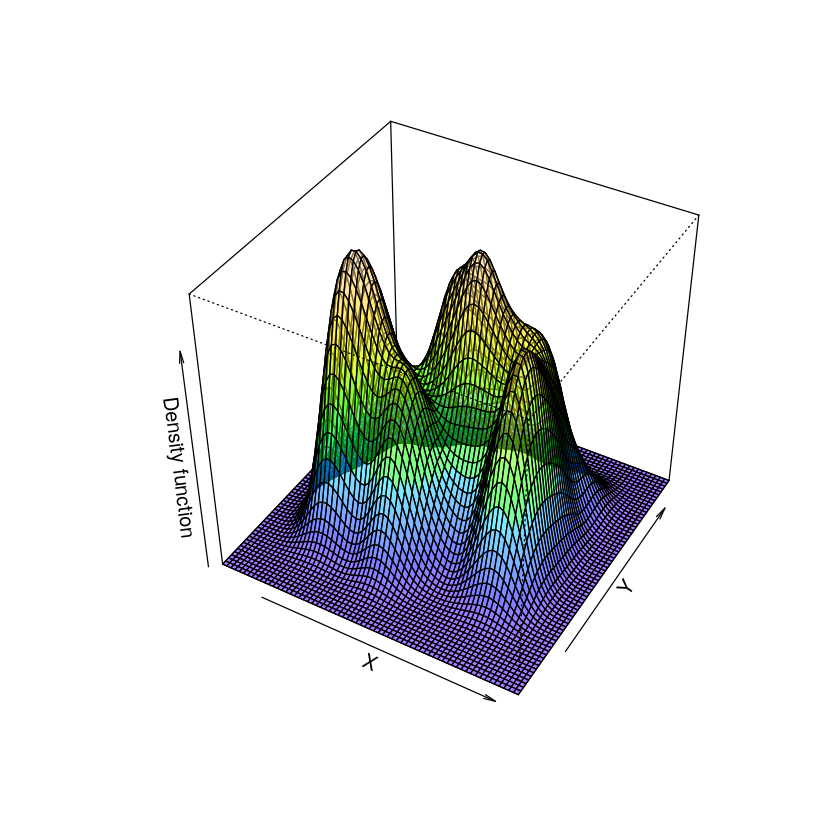

In [10]:
plot(wally.ks, display="persp", theta=30)

Loading required package: hdrcde

This is hdrcde 3.4



70% 
0.01447569

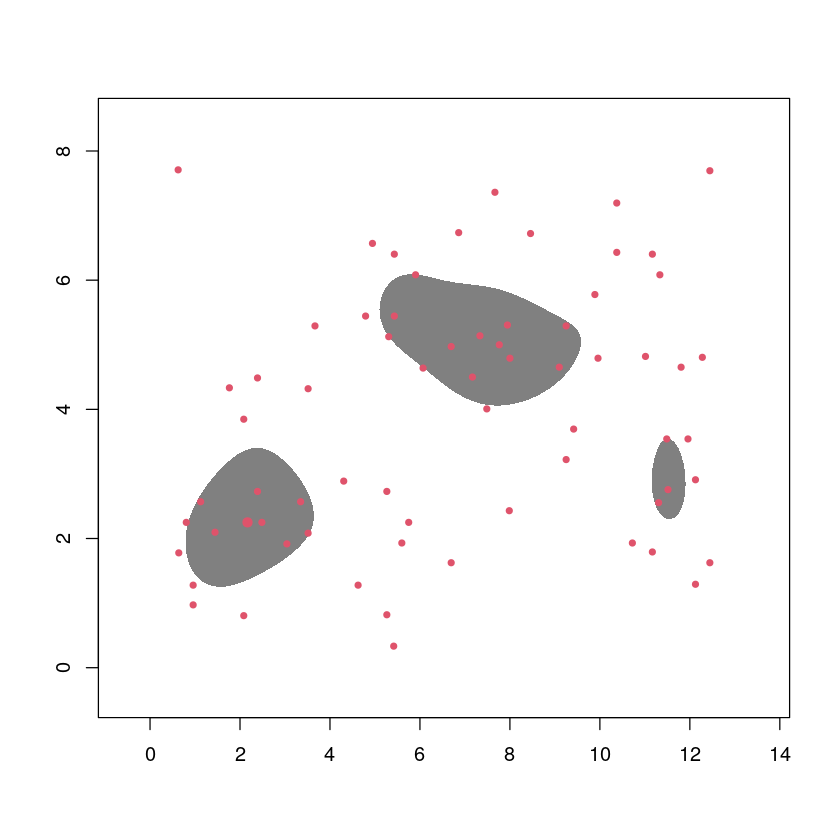

In [11]:
require(hdrcde)
wally.hdr <- hdr.2d(wally.pts$X, wally.pts$Y,  prob=0.7, kde.package="ks", h=c(1,1)) 
wally.hdr$falpha               #  cut-off constant c
plot(wally.hdr, show.points=TRUE,   pointcol=2)

[1] 2.166667 2.250000

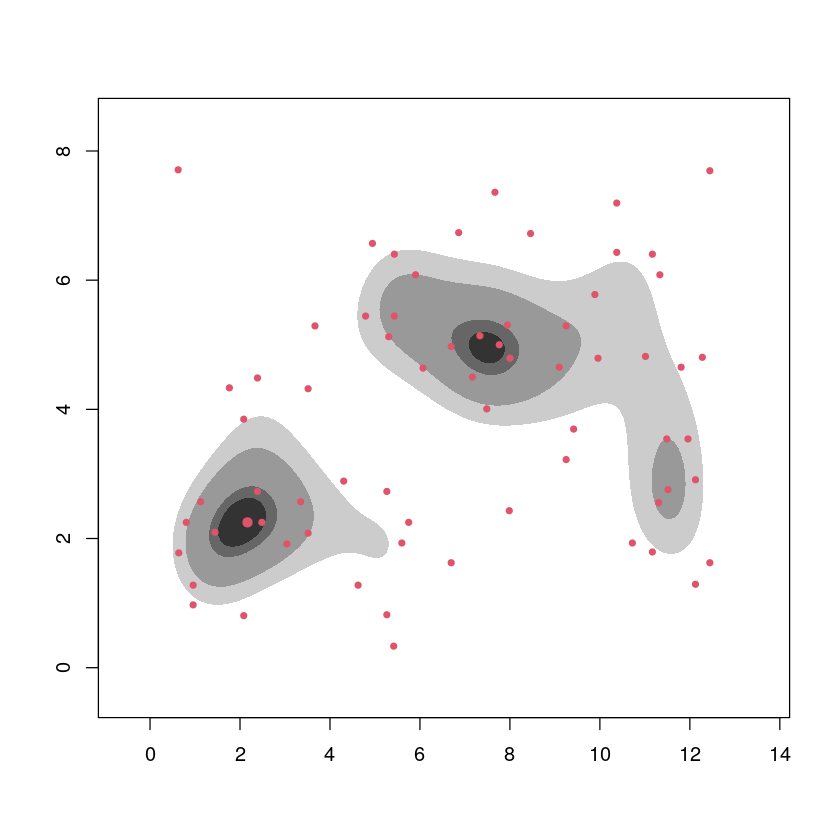

In [12]:
wally.hdr<- hdr.2d(wally.pts$X, wally.pts$Y, kde.package="ks",h=c(1,1), prob=c(0.5,0.7,0.9,0.95))
plot(wally.hdr, show.points=TRUE,  pointcol=2)
wally.hdr$mode 

Loading required package: LPCM



[1] 3.513889 4.319444

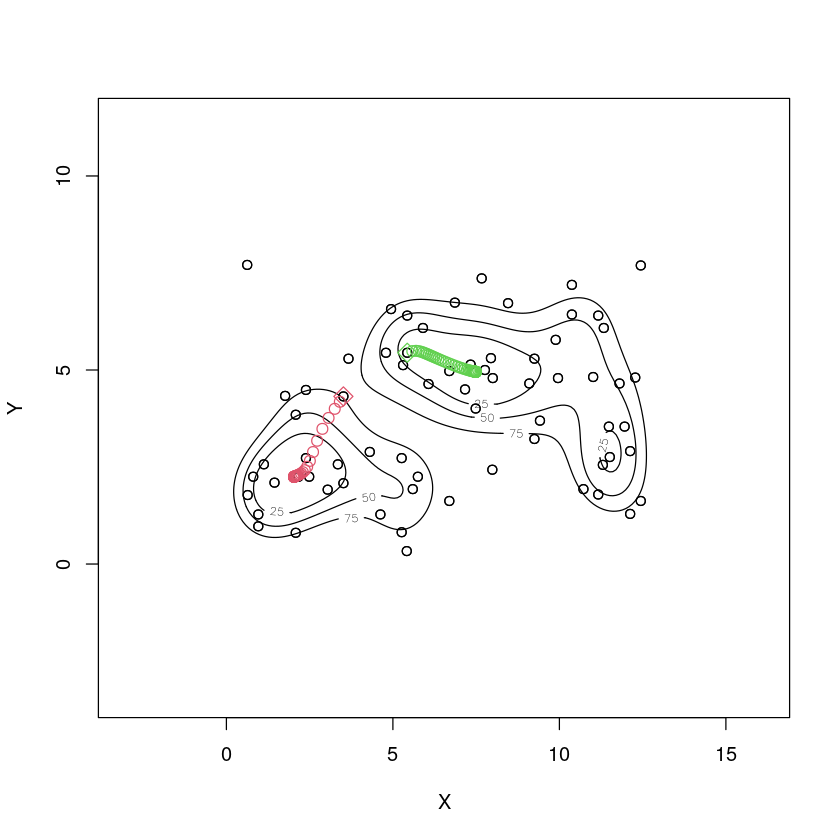

In [13]:
require(LPCM)
x1<- c(wally.pts$X[10], wally.pts$Y[10])
x1#Pick the starting points
ms.x1 <- ms.rep(wally.pts[,c("X", "Y")],x=x1, h=1)#Does the iteration


x2<- c(wally.pts$X[5], wally.pts$Y[5])
#Pick the starting points


ms.x2 <- ms.rep(wally.pts[,c("X", "Y")], 
x=x2, h=1)

plot(wally.ks)
points(wally.pts$X, wally.pts$Y)
points(wally.pts$X, wally.pts$Y)
points(x1[1], x1[2], col=2, pch=5, cex=1.5)
points(x2[1], x2[2], col=3, pch=5, cex=1.5)
points(ms.x1$Meanshift.points,  col=2, cex=1.2)
points(ms.x2$Meanshift.points,  col=3, cex=1.2)


Type plot( obj ) to see a graphical display of the fitted object. 

Type names( obj ) to see an overview of items available. 

The data have not been scaled. 

1,0.6316952,7.695737
2,7.4926538,4.952212
3,2.0306169,2.246337
4,11.5383040,2.852186


[1] 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2
[39] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 4 4 2 3 4 4 4 4 4 4 4

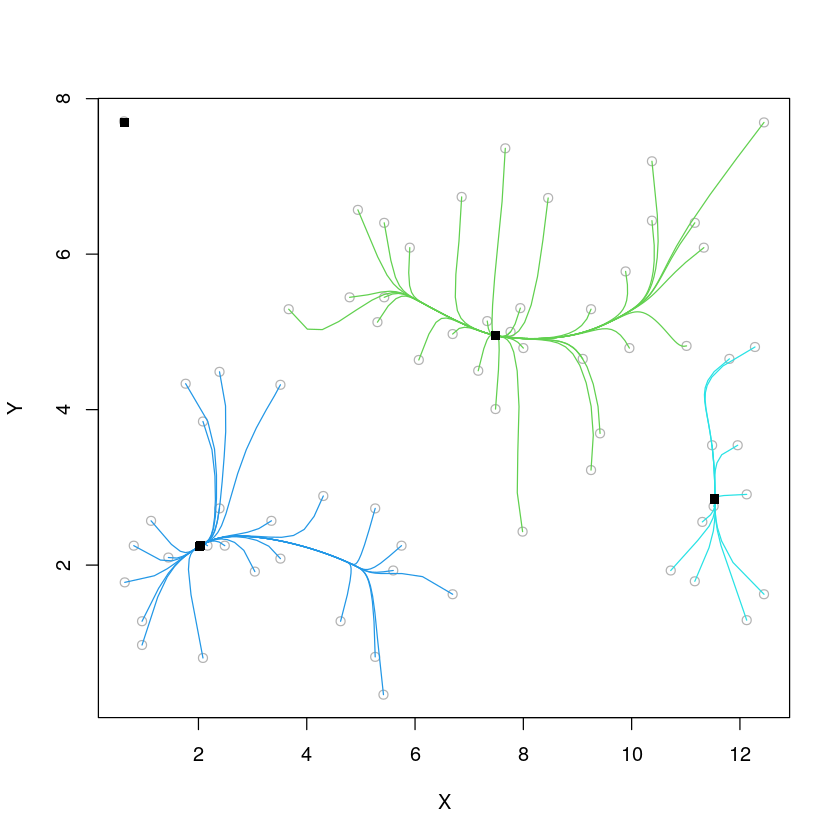

In [27]:
wally.ms <- ms(wally.pts[,c("X", "Y")], scaled=0, h=1)
wally.ms
#ms.x1 <- ms.rep(wally.pts[,c("X", "Y")],x=x1, h=1)#Does the iteration
wally.ms$cluster.center
wally.ms$cluster.label

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

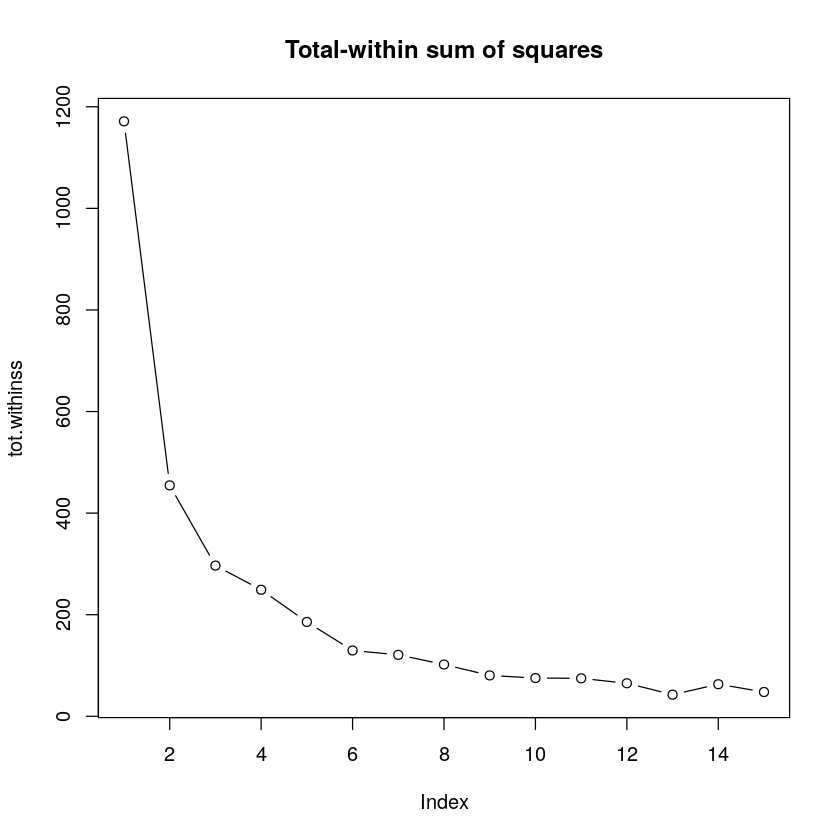

In [15]:
wally <- wally.pts[,c("X","Y")]
tot.withinss <- rep(0,15)
tot.withinss
for (k in 1:15){
  tot.withinss[k] <- kmeans(wally,k)$tot.withinss
}  
plot(tot.withinss, type="b",  main="Total-within sum of squares")

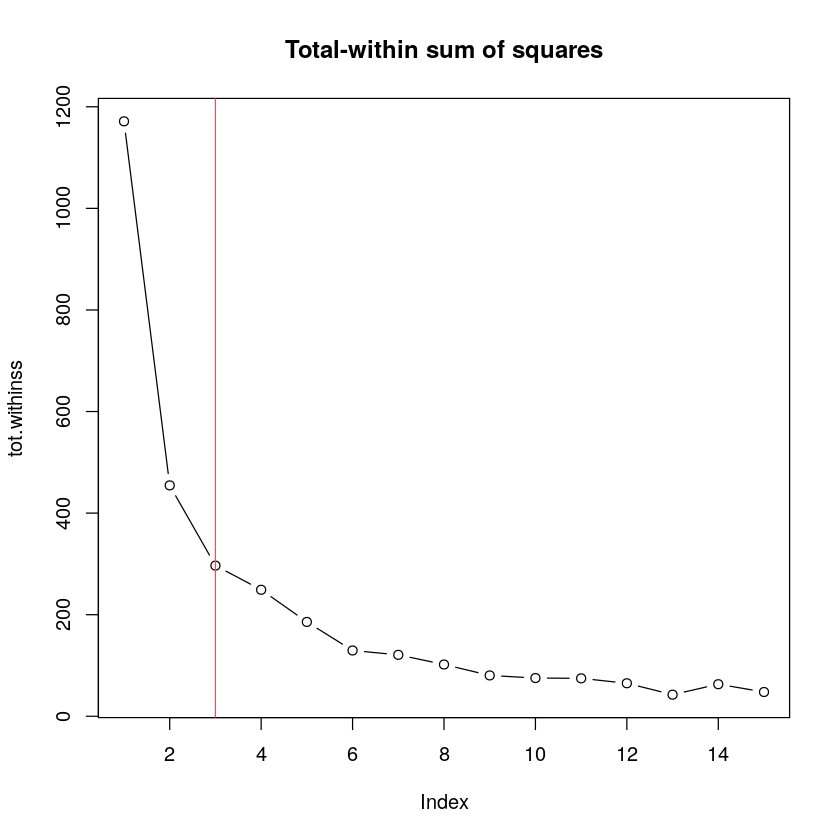

In [16]:
plot(tot.withinss, type="b", main="Total-within sum of squares")
abline(v=3, col=2)

Loading required package: cluster



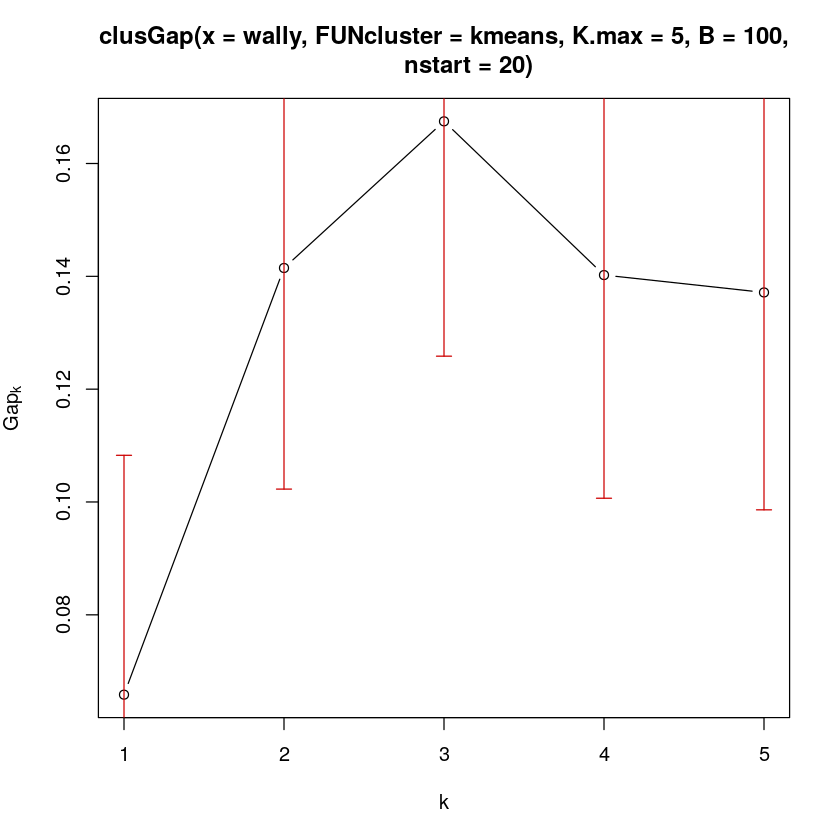

In [17]:
require(cluster)
wally.gap<- clusGap(wally,FUN=kmeans, K.max = 5, nstart=20, B = 100)
plot(wally.gap)

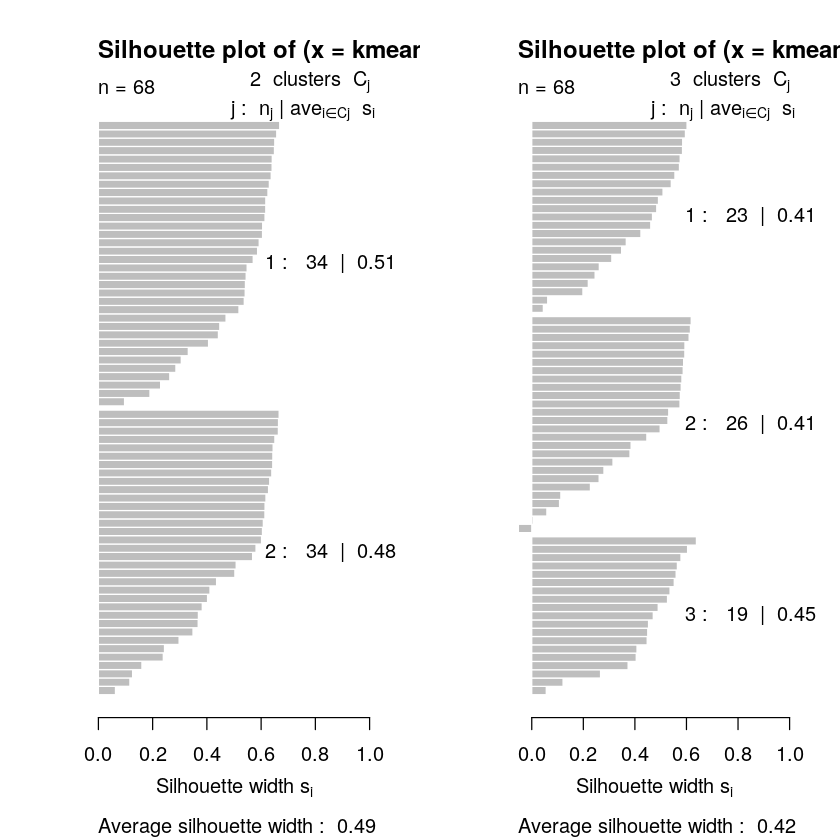

In [18]:
require(cluster)
par(mfrow=c(1,2))
for (k in 2:3){
  plot(silhouette(kmeans(wally,k)$cluster, dist(wally))) 
}

In [1]:
shil <- rep(0,15)
for (k in 2:15){
  shil[k]<- summary(silhouette(kmeans(wally,k)$cluster, dist(wally)) )$avg.width
}
plot(shil, type="b", main="Average shilhouette widths",xlab="k")

ERROR: Error in silhouette(kmeans(wally, k)$cluster, dist(wally)): could not find function "silhouette"


number of iterations= 110 
number of iterations= 111 


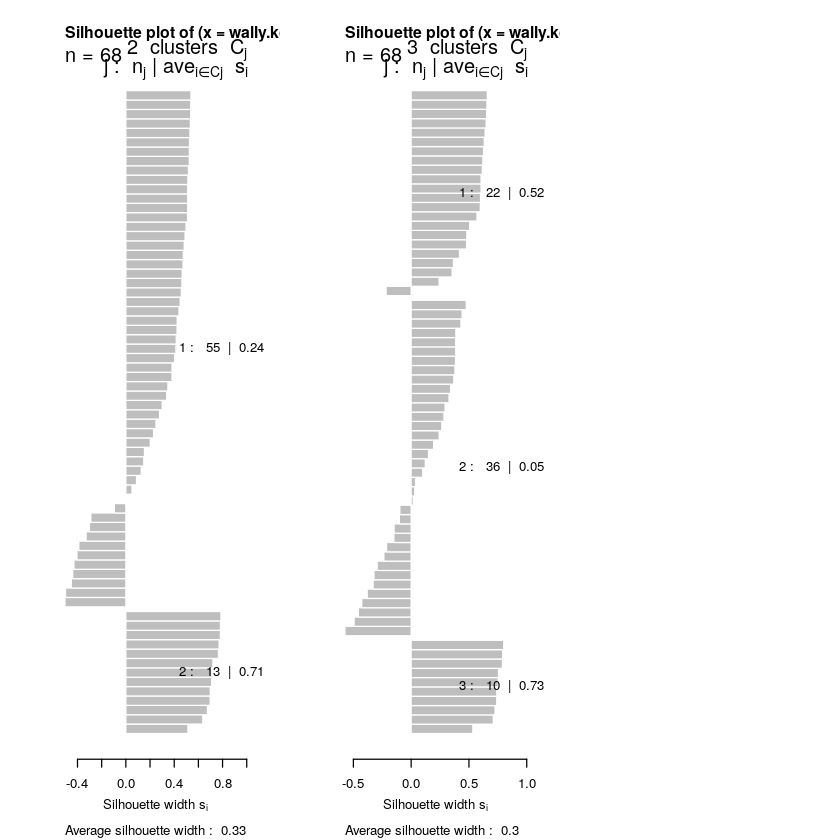

In [20]:
par(mfrow=c(1,3))
for (k in 2:3){
  wally.kmix <- mvnormalmixEM(wally, k=k)
  wally.kcluster <-  apply(wally.kmix$posterior, 1, which.max)
  plot(silhouette(wally.kcluster, dist(wally))) 
}

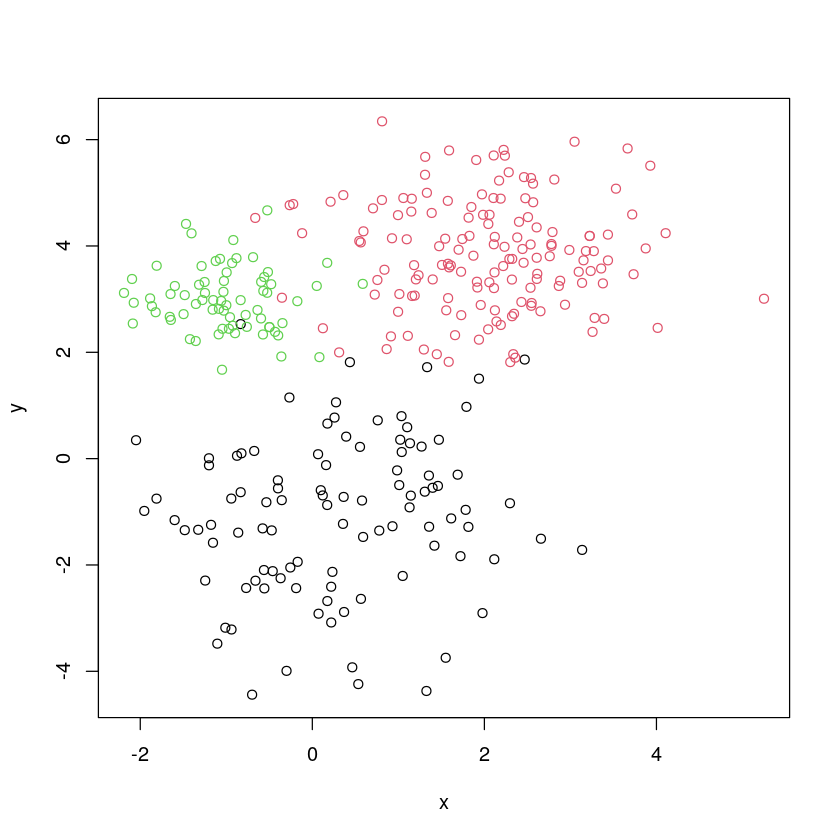

In [21]:
intro.dat <- read.table(
    "http://www.maths.dur.ac.uk/~dma0je/Data/intro-asml2.dat", header=TRUE
    )
intro.labels <- read.table("http://www.maths.dur.ac.uk/~dma0je/Data/intro-asml2-labels.dat", header=TRUE)$x
plot(intro.dat, col=intro.labels)

In [22]:
k3 <- kmeans(intro.dat, centers=3)  
require(fossil)
rand.index(intro.labels, k3$cluster)

Loading required package: fossil

Loading required package: sp

Loading required package: maps


Attaching package: ‘maps’


The following object is masked from ‘package:cluster’:

    votes.repub


The following object is masked from ‘package:mclust’:

    map


Loading required package: shapefiles

Loading required package: foreign


Attaching package: ‘shapefiles’


The following objects are masked from ‘package:foreign’:

    read.dbf, write.dbf




[1] 0.9274491

In [23]:
require(mixtools)
intro.mix <- mvnormalmixEM(intro.dat , k=3)
intro.cluster <- apply(intro.mix$posterior, 1, which.max)
rand.index(intro.labels, intro.cluster)

number of iterations= 49 


[1] 0.9538989

In [24]:
rand.index(k3$cluster, intro.cluster)

[1] 0.9328762